In [2]:
#import libraries
import os
import random as rd
import tensorflow as tf
import matplotlib.pyplot as plt
import pyBigWig as pbg
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats


In [3]:
#cor_losses
import keras.backend as K
def mae_cor(y_true, y_pred):
    """Compute loss with Mean absolute error and correlation.
        :Example:
        >>> model.compile(optimizer = 'adam', losses = mae_cor)
        >>> load_model('file', custom_objects = {'mae_cor : mae_cor})
    """
    X = y_true - K.mean(y_true)
    Y = y_pred - K.mean(y_pred)

    sigma_XY = K.sum(X*Y)
    sigma_X = K.sqrt(K.sum(X*X))
    sigma_Y = K.sqrt(K.sum(Y*Y))

    cor = sigma_XY/(sigma_X*sigma_Y + K.epsilon())
    mae = K.mean(K.abs(y_true - y_pred))

    return (1 - cor) + mae

def mse_cor(y_true, y_pred):
    """Compute loss with Mean squared error and correlation.
    """
    X = y_true - K.mean(y_true)
    Y = y_pred - K.mean(y_pred)

    sigma_XY = K.sum(X*Y)
    sigma_X = K.sqrt(K.sum(X*X))
    sigma_Y = K.sqrt(K.sum(Y*Y))

    cor = sigma_XY/(sigma_X*sigma_Y + K.epsilon())
    mse = K.sqrt(K.mean(K.abs(y_true - y_pred)**2))

    return (1 - cor) + mse

In [4]:
#get all chr and their respective lenghts
X_2L=np.load('/home/florian/projet/r6.16/seq.npz')['2L']
X_2R=np.load('/home/florian/projet/r6.16/seq.npz')['2R']
X_3L=np.load('/home/florian/projet/r6.16/seq.npz')['3L']
X_3R=np.load('/home/florian/projet/r6.16/seq.npz')['3R']
X_4=np.load('/home/florian/projet/r6.16/seq.npz')['4']
X_X=np.load('/home/florian/projet/r6.16/seq.npz')['X']
X_Y=np.load('/home/florian/projet/r6.16/seq.npz')['Y']

In [3]:
#single bigwig to numpy
os.chdir('/home/florian/projet/scATACseq')
fichiers=['/home/florian/projet/scATACseq/Astrocyte_like.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Cortexglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Ensheathingglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Perineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Subperineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T1.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2a.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T3.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T4.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T5.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_AB.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_ABp.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_G.dedup.no_blacklist.RPGCnormalized.bw']
valeurs =[]
chr=["2L","2R","3R","3L","4","X","Y"]
for file in fichiers:
    #print("processing file", file)
    bw=pbg.open(file)
    array = np.array(())
    for j in chr:
        array=np.append(array,bw.values(j,0,-1,numpy=True))
    if len(valeurs) == 0:
        valeurs = array
    else:
        valeurs += array
os.chdir('/home/florian/projet')
np.savez_compressed('scATACseq14',valeurs=valeurs)

In [ ]:
#bigwig to numpy v3
os.chdir('/home/florian/projet/scATACseq')
fichiers=['/home/florian/projet/scATACseq/Astrocyte_like.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Cortexglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Ensheathingglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Perineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/Subperineurialglia.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T1.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T2a.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T3.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T4.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/T5.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_AB.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_ABp.dedup.no_blacklist.RPGCnormalized.bw',
'/home/florian/projet/scATACseq/KC_G.dedup.no_blacklist.RPGCnormalized.bw']
valeurs =[]
Dic={}
chr=["2L","2R","3L","3R","4","X","Y"]
lens=[len(X_2L),len(X_2R),len(X_3L),len(X_3R),len(X_4),len(X_X),len(X_Y)]
for i in range(len(chr)):
    Dic[chr[i]]=np.zeros((1,lens[i]))
for file in fichiers:
    #print("processing file", file)
    bw=pbg.open(file)
    array = np.array(())
    for j in chr:
        Dic[j]=Dic[j]+bw.values(j,0,-1,numpy=True)

os.chdir('/home/florian/projet')
np.savez_compressed('scATACseq_14chr',**Dic)

In [33]:
#create scATAC values for each chr
Y_2L=np.load('/home/florian/projet/scATACseq_14chr.npz')['2L'][0]
Y_2L[Y_2L >= 400] = 400
Y_2L=Y_2L/400

Y_2R=np.load('/home/florian/projet/scATACseq_14chr.npz')['2R'][0]
Y_2R[Y_2R >= 400] = 400
Y_2R=Y_2R/400

Y_3L=np.load('/home/florian/projet/scATACseq_14chr.npz')['3L'][0]
Y_3L[Y_3L >= 400] = 400
Y_3L=Y_3L/400

Y_3R=np.load('/home/florian/projet/scATACseq_14chr.npz')['3R'][0]
Y_3R[Y_3R >= 400] = 400
Y_3R=Y_3R/400

Y_4=np.load('/home/florian/projet/scATACseq_14chr.npz')['4'][0]
Y_4[Y_4 >= 400] = 400
Y_4=Y_4/400

Y_X=np.load('/home/florian/projet/scATACseq_14chr.npz')['X'][0]
Y_X[Y_X >= 400] = 400
Y_X=Y_X/400

Y_Y=np.load('/home/florian/projet/scATACseq_14chr.npz')['Y'][0]
Y_Y[Y_Y >= 400] = 400
Y_Y=Y_Y/400

In [4]:
val=np.load('/home/florian/projet/scATACseq14.npz')['valeurs']
val[val >= 400] = 400
val=val/400
#weights=
bin_values, bin_edges = np.histogram(val, bins=500)
bin_indices = np.digitize(val, bin_edges)
bin_indices[bin_indices == 501] = 500
bin_indices -= 1
weights = 1 / bin_values[bin_indices]

In [34]:
#create binned scATAC values for each chr
Y_2L_bins=[]
for i in Y_2L[::10]:
    Y_2L_bins+=[i]*10
while len(Y_2L_bins)>len(X_2L):
    Y_2L_bins.pop()
Y_2L_bins=np.array(Y_2L_bins)

Y_2R_bins=[]
for i in Y_2R[::10]:
    Y_2R_bins+=[i]*10
while len(Y_2R_bins)>len(X_2R):
    Y_2R_bins.pop()
Y_2R_bins=np.array(Y_2R_bins)

Y_3L_bins=[]
for i in Y_3L[::10]:
    Y_3L_bins+=[i]*10
while len(Y_3L_bins)>len(X_3L):
    Y_3L_bins.pop()
Y_3L_bins=np.array(Y_3L_bins)

Y_3R_bins=[]
for i in Y_3R[::10]:
    Y_3R_bins+=[i]*10
while len(Y_3R_bins)>len(X_3R):
    Y_3R_bins.pop()
Y_3R_bins=np.array(Y_3R_bins)

Y_4_bins=[]
for i in Y_4[::10]:
    Y_4_bins+=[i]*10
while len(Y_4_bins)>len(X_4):
    Y_4_bins.pop()
Y_4_bins=np.array(Y_4_bins)

Y_X_bins=[]
for i in Y_X[::10]:
    Y_X_bins+=[i]*10
while len(Y_X_bins)>len(X_X):
    Y_X_bins.pop()
Y_X_bins=np.array(Y_X_bins)

Y_Y_bins=[]
for i in Y_Y[::10]:
    Y_Y_bins+=[i]*10
while len(Y_Y_bins)>len(X_Y):
    Y_Y_bins.pop()
Y_Y_bins=np.array(Y_Y_bins)


(100000.0, 200000.0)

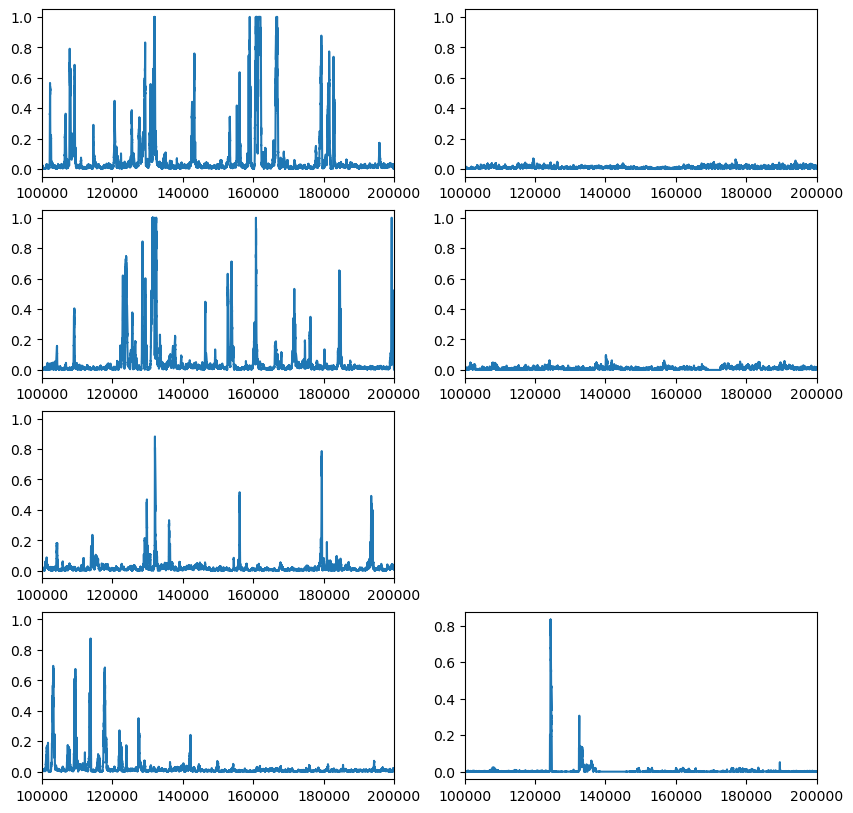

In [35]:
w_start, w_stop = 100_000, 200_000

plt.figure(figsize=(10,10))

plt.subplot(4,2,1)
plt.plot(Y_2L)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,2)
plt.plot(Y_2R)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,3)
plt.plot(Y_3L)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,4)
plt.plot(Y_3R)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,5)
plt.plot(Y_4)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,7)
plt.plot(Y_X)
plt.xlim(w_start,w_stop)

plt.subplot(4,2,8)
plt.plot(Y_Y)
plt.xlim(w_start,w_stop)


In [41]:
#generator weighted homebrew (new weights each batch) binned
class MyHbWeightedSequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size, max_data=2**20, WINDOW=2001):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size
        self.WINDOW = WINDOW
        n_data = min(len(self.x)-self.WINDOW+1, max_data)
        self.indices = np.arange(self.WINDOW//2, n_data+self.WINDOW//2)#[::10]
        np.random.shuffle(self.indices)

    def __len__(self):
        return int(np.ceil(len(self.indices) / self.batch_size))

    def __getitem__(self, idx):
        batch_indices = self.indices[idx*self.batch_size:(idx+1)*self.batch_size]
        window_indices = batch_indices.reshape(-1, 1) + np.arange(-(self.WINDOW//2), self.WINDOW//2 + 1).reshape(1, -1)
        batch_x = self.x[window_indices]
        batch_y = self.y[batch_indices]
        bin_values, bin_edges = np.histogram(batch_y, bins=500)
        bin_indices = np.digitize(batch_y, bin_edges)
        bin_indices[bin_indices == 501] = 500
        bin_indices -= 1
        batch_weights = 1 / bin_values[bin_indices]
        return batch_x, batch_y, batch_weights
        
    def on_epoch_end(self):
        np.random.shuffle(self.indices)


In [42]:
#generates homebrew weighted values
x=X_2R
y=Y_2R
x_valid=X_2L
y_valid=Y_2L
gen = MyHbWeightedSequence(x, y, 4096, max_data=2**20)
gen_valid = MyHbWeightedSequence(x_valid, y_valid, 1024, max_data=2**14)

In [59]:
np.any(np.isnan(X_X))

False

In [43]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(128, kernel_size=(6), activation='relu', input_shape=(2001,4)),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, kernel_size=(12), activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, kernel_size=(12), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])

model2.compile(loss=mse_cor,
    optimizer='adam',
    metrics=['mae'])

In [44]:
#training with checkpoint saving
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/home/florian/projet/models/binned_training_reversed/cp.cpkt',
                                                 save_weights_only=True,
                                                 verbose=1)
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=3,restore_best_weights=True)
model2.fit(gen,validation_data=gen_valid,epochs=10,verbose=1, callbacks=[cp_callback,early_stop_callback])

Epoch 1/10
 29/256 [==>...........................] - ETA: 19:56 - loss: nan - mae: nan

KeyboardInterrupt: 

In [12]:
#create data set for prediction
start, stop = 50_000, 150_000
X_chr2L=[]
for i in range(start,stop):
    X_chr2L.append(X_2L[i-1000:i+1001])
X_chr2L = np.array(X_chr2L)

In [13]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(128, kernel_size=(6), activation='relu', input_shape=(2001,4)),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(64, kernel_size=(12), activation='relu'),
    tf.keras.layers.MaxPooling1D(pool_size=(2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(32, kernel_size=(12), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
    ])
model2.load_weights('/home/florian/projet/models/binned_training_reversed/cp.cpkt')
pred2L=model2.predict(X_chr2L,batch_size=1024)

98/98 [==============================] - 39s 395ms/step


In [47]:
len(pred2L)

100000

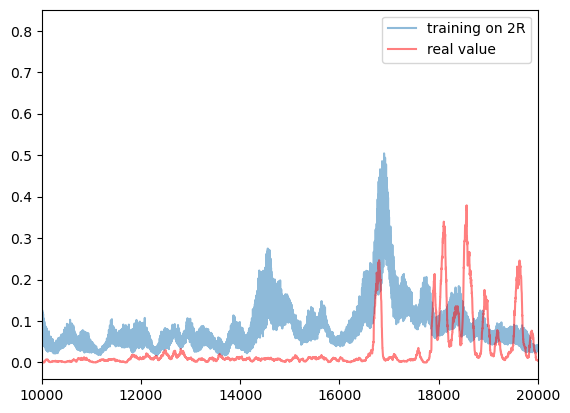

In [14]:
plt.plot(pred2L,alpha=0.5,label="training on 2R")
plt.plot(Y_2L[:50_000],alpha=0.5,label="real value",color="red")
plt.xlim((10_000, 20_000))
plt.legend()

In [28]:
print("correlation 2L", str(np.corrcoef(Y_2L[50_000:150_000],pred2L.ravel())[0][1]))

correlation 2L 0.7102901029683641
